In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving comments.tsv to comments.tsv


In [ ]:
import pandas as pd
data = pd.read_csv("/content/comments.tsv", sep = '\t')

In [ ]:
texts = data['comment_text'].values
target = data['should_ban'].values

In [ ]:
data[50::200]

,should_ban,comment_text
50,0,"""Those who're in advantageous positions are th..."
250,1,Fartsalot56 says f**k you motherclucker!!
450,1,"Are you a fool? \n\nI am sorry, but you seem t..."
650,1,I AM NOT A VANDAL!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
850,0,Citing sources\n\nCheck out the Wikipedia:Citi...


In [ ]:
data.shape

(1000, 2)

In [ ]:
from sklearn.model_selection import train_test_split
texts_train, texts_test, y_train, y_test = train_test_split(texts, target, test_size = 0.5, random_state = 42)

In [ ]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()
preprocess = lambda text: ' '.join(tokenizer.tokenize(text.lower()))

text = 'How to be a grown-up at work: replace "fuck you" with "Ok, great!".'
print("before:", text)
print("after:", preprocess(text))

before: How to be a grown-up at work: replace "fuck you" with "Ok, great!".
after: how to be a grown-up at work : replace " fuck you " with " ok , great ! " .


In [ ]:
texts_train = np.array([preprocess(sentence) for sentence in texts_train])
texts_test = np.array([preprocess(sentence) for sentence in texts_test])

In [ ]:
assert texts_train[5] ==  'who cares anymore . they attack with impunity .'
assert texts_test[89] == 'hey todds ! quick q ? why are you so gay'
assert len(texts_test) == len(y_test)

In [ ]:
# task: find up to k most frequent tokens in texts_train,
# sort them by number of occurences (highest first)
k = 10000

#for sentence in texts_train:
 # for text in sentence.split():
 #Counter, most common
unique_words, counts_words = np.unique(' '.join(texts_train).split(), return_counts=True)

bow_vocabulary = unique_words[np.argsort(counts_words)[-k:]]

print('example features:', sorted(bow_vocabulary)[::1000])

example features: ['!', 'came', 'faggot', 'lets', 'punctuation', 'theoretical']


In [ ]:
word_to_id = dict(zip(bow_vocabulary, np.arange(len(bow_vocabulary))))

In [ ]:
def text_to_bow(text):
    """ convert text string to an array of token counts. Use bow_vocabulary. """
    embedding = np.zeros(len(bow_vocabulary))
    for word in text.split():
      if word in word_to_id.keys():
        embedding[word_to_id[word]] += 1
    
    return np.array(embedding, 'float32')

In [ ]:
X_train_bow = np.stack(list(map(text_to_bow, texts_train)))
X_test_bow = np.stack(list(map(text_to_bow, texts_test)))

In [ ]:
k_max = len(set(' '.join(texts_train).split()))
assert X_train_bow.shape == (len(texts_train), min(k, k_max))
assert X_test_bow.shape == (len(texts_test), min(k, k_max))
assert np.all(X_train_bow[5:10].sum(-1) == np.array([len(s.split()) for s in  texts_train[5:10]]))
assert len(bow_vocabulary) <= min(k, k_max)
assert X_train_bow[6, list(bow_vocabulary).index('.')] == texts_train[6].split().count('.')

In [ ]:
np.array([sum(y_train == k)/len(y_train) for k in set(y_train)])

array([0.522, 0.478])

In [ ]:
wp = sum(X_train_bow[y_train==1])
wn = sum(X_train_bow[y_train==0])

In [ ]:
pxp = np.array([(1 + wp[i])/(wn[i] + wp[i] + X_train_bow.shape[1]) for i in range(X_train_bow.shape[1])])

In [ ]:
f_index = list(bow_vocabulary).index('fuck')

In [ ]:
pxp[f_index]


0.007632263660017346

In [ ]:
sum(y_train==0)

261

In [ ]:
X_train_bow.shape[1]

5722

In [ ]:
class BinaryNaiveBayes:
  self.delta = 1.0  # add this to all word counts to smoothe probabilities
    
  def fit(self, X, y):
    """
        Fit a NaiveBayes classifier for two classes
        :param X: [batch_size, vocab_size] of bag-of-words features
        :param y: [batch_size] of binary targets {0, 1}
    """
    # first, compute marginal probabilities of every class, p(y=k) for k = 0,1
    self.p_y = np.array([sum(y == k)/len(y) for k in set(y)])
        
    # count occurences of each word in texts with label 1 and label 0 separately
    word_counts_positive = sum(X_train_bow[y_train==1])
    word_counts_negative = sum(X_train_bow[y_train==0])
    # ^-- both must be vectors of shape [vocab_size].
        
    # finally, lets use those counts to estimate p(x | y = k) for k = 0, 1
    #for i in X.shape[1]:
     # p_xi_given_positive = (self.delta + word_counts_positive[i])/(word_counts_negative[i] + word_counts_positive[i] + self.delta * X.shape[1])
      #p_xi_given_negative = (self.delta + word_counts_negative[i])/(word_counts_negative[i] + word_counts_positive[i] + self.delta * X.shape[1])
    self.p_x_given_positive = np.array([(self.delta + word_counts_positive[i])/(word_counts_negative[i] + word_counts_positive[i] + self.delta * X.shape[1]) for i in range(X.shape[1])])
    self.p_x_given_negative = np.array([(self.delta + word_counts_negative[i])/(word_counts_negative[i] + word_counts_positive[i] + self.delta * X.shape[1]) for i in range(X.shape[1])])
    # both must be of shape [vocab_size]; and don't forget to add self.delta!
        
    return self
    
  def predict_scores(self, X):
    """
        :param X: [batch_size, vocab_size] of bag-of-words features
        :returns: a matrix of scores [batch_size, k] of scores for k-th class
    """
    # compute scores for positive and negative classes separately.
    # these scores should be proportional to log-probabilities of the respective target {0, 1}
    # note: if you apply logarithm to p_x_given_*, the total log-probability can be written
    # as a dot-product with X
    score_negative = 
    score_positive = <YOUR CODE HERE - compute positive negative log-probability>
        
    # you can compute total p(x | y=k) with a dot product
    return np.stack([score_negative, score_positive], axis=-1)
    
  def predict(self, X):
    return self.predict_scores(X).argmax(axis=-1)

In [ ]:
naive_model = BinaryNaiveBayes().fit(X_train_bow, y_train)

In [ ]:
assert naive_model.p_y.shape == (2,) and naive_model.p_y.sum() == 1 and naive_model.p_y[0] > naive_model.p_y[1]
assert naive_model.p_x_given_positive.shape == naive_model.p_x_given_negative.shape == X_train_bow.shape[1:]
assert np.allclose(naive_model.p_x_given_positive.sum(), 1.0)
assert np.allclose(naive_model.p_x_given_negative.sum(), 1.0)
assert naive_model.p_x_given_negative.min() > 0, "did you forget to add delta?"

f_index = list(bow_vocabulary).index('fuck')  # offensive tweets should contain more of this
assert naive_model.p_x_given_positive[f_index] > naive_model.p_x_given_negative[f_index]

g_index = list(bow_vocabulary).index('good')  # offensive tweets should contain less of this
assert naive_model.p_x_given_positive[g_index] < naive_model.p_x_given_negative[g_index]

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

for name, X, y, model in [('train', X_train_bow, y_train, naive_model), ('test ', X_test_bow, y_test, naive_model)]:
  proba = model.predict_scores(X)[:, 1] - model.predict_scores(X)[:, 0]
  auc = roc_auc_score(y, proba)
  plt.plot(*roc_curve(y, proba)[:2], label='%s AUC=%.4f' % (name, auc))

plt.plot([0, 1], [0, 1], '--', color='black',)
plt.legend(fontsize='large')
plt.grid()

test_accuracy = np.mean(naive_model.predict(X_test_bow) == y_test)
print(f"Model accuracy: {test_accuracy:.3f}")
assert test_accuracy > 0.75, "Accuracy too low. There's likely a mistake in the code."
print("Well done!")

In [ ]:
from sklearn.linear_model import LogisticRegression
bow_model = LogisticRegression().fit(X_train_bow, y_train)

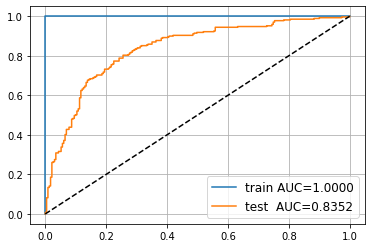

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

for name, X, y, model in [
    ('train', X_train_bow, y_train, bow_model),
    ('test ', X_test_bow, y_test, bow_model)
]:
    proba = model.predict_proba(X)[:, 1]
    auc = roc_auc_score(y, proba)
    plt.plot(*roc_curve(y, proba)[:2], label='%s AUC=%.4f' % (name, auc))

plt.plot([0, 1], [0, 1], '--', color='black',)
plt.legend(fontsize='large')
plt.grid()

In [ ]:
# at first we should count number of document including word for each word
words_in_documents = np.zeros((len(bow_vocabulary)))
for text in texts_train:
    unique_words = np.unique(text.split())
    for word in unique_words:
        words_in_documents[word_to_id[word]] += 1

In [ ]:
def text_to_tfidf(text):
    words = text.split()
    embedding = (text_to_bow(text) / len(words))  * np.log(len(texts_train) / words_in_documents)
    return np.array(embedding, 'float32')

In [ ]:
X_train_tfidf = np.stack(list(map(text_to_tfidf, texts_train)))
X_test_tfidf = np.stack(list(map(text_to_tfidf, texts_test)))

In [ ]:
tfidf_model = LogisticRegression().fit(X_train_tfidf, y_train)

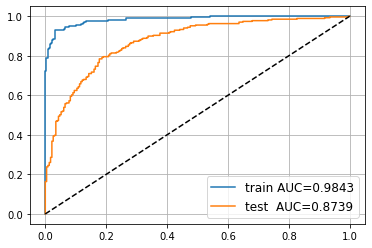

In [ ]:
for name, X, y, model in [
    ('train', X_train_tfidf, y_train, tfidf_model),
    ('test ', X_test_tfidf, y_test, tfidf_model)
]:
    proba = model.predict_proba(X)[:, 1]
    auc = roc_auc_score(y, proba)
    plt.plot(*roc_curve(y, proba)[:2], label='%s AUC=%.4f' % (name, auc))

plt.plot([0, 1], [0, 1], '--', color='black',)
plt.legend(fontsize='large')
plt.grid()

In [ ]:
import gensim.downloader 
embeddings = gensim.downloader.load("fasttext-wiki-news-subwords-300")

[=================================================-] 98.2% 941.0/958.4MB downloaded

In [ ]:
def vectorize_sum(comment):
    """
    implement a function that converts preprocessed comment to a sum of token vectors
    """
    embedding_dim = embeddings.vectors.shape[1]
    features = np.zeros([embedding_dim], dtype='float32')
    features.shape
    
    words = comment.split()
    for word in words:
        if word in embeddings.vocab.keys():
            features += embeddings[word]
        else:
            features += embeddings['UNK']
    
    return features

assert np.allclose(
    vectorize_sum("who cares anymore . they attack with impunity .")[::70],
    np.array([ 0.0108616 ,  0.0261663 ,  0.13855131, -0.18510573, -0.46380025])
)

In [ ]:
X_train_wv = np.stack([vectorize_sum(text) for text in texts_train])
X_test_wv = np.stack([vectorize_sum(text) for text in texts_test])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


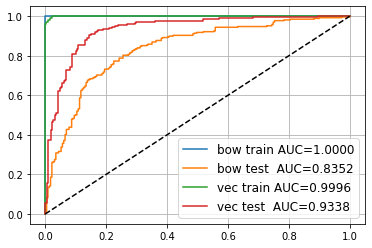

In [ ]:
wv_model = LogisticRegression().fit(X_train_wv, y_train)

for name, X, y, model in [
    ('bow train', X_train_bow, y_train, bow_model),
    ('bow test ', X_test_bow, y_test, bow_model),
    ('vec train', X_train_wv, y_train, wv_model),
    ('vec test ', X_test_wv, y_test, wv_model)
]:
    proba = model.predict_proba(X)[:, 1]
    auc = roc_auc_score(y, proba)
    plt.plot(*roc_curve(y, proba)[:2], label='%s AUC=%.4f' % (name, auc))

plt.plot([0, 1], [0, 1], '--', color='black',)
plt.legend(fontsize='large')
plt.grid()

assert roc_auc_score(y_test, wv_model.predict_proba(X_test_wv)[:, 1]) > 0.92, "something's wrong with your features"